# Discussion 2: Validation

## Introduction

The typical supervised training problem goes like this:
- There is a set $\mathcal{X}$ of *inputs* and a set $\mathcal{Y}$ of *outputs*
- There is a function $f \colon \mathcal{X} \to \mathcal{Y}$ that *we would like to learn*
- We have access to a large amount of data $D = \{(x_i, y_i)\}_{i =1}^n$ such that $y_i = f(x_i) + \varepsilon_i$, where $\varepsilon_i$ is noise
- We have an algorithm $A$ that takes our data as input and gives us a function $g \colon \mathcal{X} \to \mathcal{Y}$, i.e., $g = A(D)$, such that $g(x_i) \approx y_i$ for all $i$, i.e., $g$ matches our data well
- But what we really want is $g(x) \approx f(x)$ for all $x \in \mathcal{X}$

### The test set
- How do we estimate the ability of $g$ to approximate $f$ on values of $x$ unseen during training?
- The typical way to do this is to split $D$ into two disjoint sets: $D = D_r \cup D_e$, where $D_r$ is called the *training set*, and $D_e$ is called the *test set*
- We use the training set in order to learn the function: $g = A(D_r)$
- And we use the test set to estimate how well $g$ does on data it didn't see during training. The hope is that the *test error* will be close to the *true error* of the approximation
- The test set $D_e$ is only used to estimate the *true error* of $g$

#### Example
Consider the function
$
f(x) = e^{\frac{x-a}{b}}
$
for some constants $a$ and $b$.
We will do the following
- Sample points $\{x_i\}_{i=1}^n$ in the interval $[-10,10]$, evaluate $f$ at those points, and add noise: $f(x_i) + \varepsilon_i$
- Extract a subset of those points and call this set of points $D$. This is the data from which we can learn an approximation
- Split $D$ into a training set $D_r$ and a test set $D_e$
- Use linear regression to fit the data $D_r$ to a specific set of features
- Then we will check the error of the estimate on the test set, and on the entire set

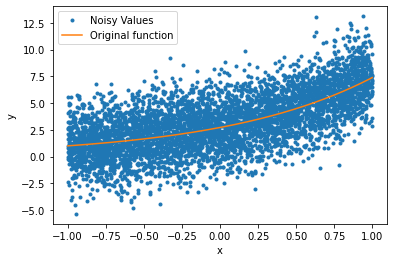

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interactive, fixed
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# we sample the x values uniformly
N = 5000
xVals = np.sort(2*np.random.rand(N)-1.0).reshape(-1,1)

# evaluate the true function values
# differentiate between that and the noisy observations
noise_weight = 2
yVals = np.exp((xVals + 1)/1.0)
yValsNoisy = yVals + noise_weight*np.random.randn(N,1)

# plot the noisy data that we will use for training and the
# original function that we are trying to learn
fig, ax = plt.subplots()
ax.plot(xVals, yValsNoisy, '.', xVals, yVals, '-')
ax.set(xlabel='x', ylabel='y')
ax.legend(['Noisy Values', 'Original function'],loc='upper left')
plt.show()

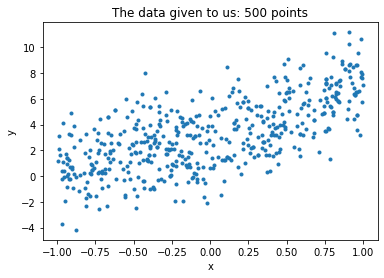

In [21]:
# From the true data, someone extracts a subset and gives it to us. In this case,
# this person samples the data randomly
n = int(N*0.1)
indices = np.sort(np.random.choice(N, n))
xGiven = xVals[indices].reshape((-1,1))
yGiven = yValsNoisy[indices].reshape((-1,1))

# let's plot the data we are given
fig = plt.figure()
ax = fig.gca()
ax.plot(xGiven, yGiven, '.')
plt.xlabel('x'); plt.ylabel('y');
plt.title("The data given to us: " + str(n) + " points")
plt.show()

In [22]:
# we split the data given to us into a training set and a test set
def trainTestPartition(xValues, yValues):
    n = len(xValues)
    trainIndices_num = np.sort(np.random.choice(n, int(0.8*n), replace=False))
    testIndices = np.ones((n,1),bool)
    testIndices[trainIndices_num] = False
    # WARNING!!! The following line is buggy. Fix it
    trainIndices  = np.zeros((n,1),bool)

    xTrain = xValues[trainIndices].reshape(-1,1)
    yTrain = yValues[trainIndices].reshape(-1,1)
    xTest = xValues[testIndices].reshape(-1,1)
    yTest = yValues[testIndices].reshape(-1,1)
    
    return xTrain, yTrain, xTest, yTest

# we will now fit a polynomial to this data
# In principle, we don't know how the data was generated. We will try to fit the data with a 
# degree-5 polynomial
def featurizeVector(xVec):
    return np.concatenate((np.ones(xVec.shape), xVec, xVec**2, xVec**3,
                           xVec**4, xVec**5), axis=1)

def predict(reg, xVec):
    A = featurizeVector(xVec)
    return reg.predict(A)

def fit(xAry, yAry):
    A = featurizeVector(xAry)
    return LinearRegression().fit(A, yAry)

# we partition the data given to us into two sets: train and test
xTrain, yTrain, xTest, yTest = trainTestPartition(xGiven, yGiven)

# solve the least squares problem A w = yGiven
reg = fit(xTrain, yTrain)

# report the training error
y_train_predictions = predict(reg, xTrain)
trainErr = mean_squared_error(y_train_predictions, yTrain)
print("Training error: " + str(trainErr))

# report the test error
y_test_predictions = predict(reg, xTest)
testErr = mean_squared_error(y_test_predictions, yTest)
print("Test error: " + str(testErr))

# because we have access to the entire dataset, we can also check
# the true error on the dataset
y_vals_predictions = predict(reg, xVals)
trueErr = mean_squared_error(y_vals_predictions, yVals)
print("True error: " + str(trueErr)) 

# plot the predictions of the polynomial over the entire interval [-10,10]
# and also plot the original function
yAllPredictions = predict(reg, xVals)
fig, ax = plt.subplots()
ax.plot(xVals, yVals, '.', xVals, yAllPredictions, '-')
ax.set(xlabel='x', ylabel='y', title='Function approximation')
ax.legend(['Original function', 'Function learned'],loc='lower right')
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required.

- **What can you say about these errors? Are they what you would expect?**
- **Does the train error closely track the test error?**
- **Is the test error close to the true error?**
- **How many significant digits do you have?**

Suppose that the data we are given is now not randomly sampled. We'll see what happens...

In [ ]:
# now we are given all data for x values larger than 2
indices = xVals > 0.2
xGiven = xVals[indices].reshape((-1,1))
yGiven = yValsNoisy[indices].reshape((-1,1))

# let's plot the data we are given
fig = plt.figure()
ax = fig.gca()
ax.plot(xGiven, yGiven, '.')
plt.xlabel('x'); plt.ylabel('y');
plt.title("The data given to us: " + str(n) + " points")
plt.show()

In [ ]:
# we partition the data given to us into two sets
xTrain, yTrain, xTest, yTest = trainTestPartition(xGiven, yGiven)

# solve the least squares problem A w = yGiven. This will fit a function
# w_0 + w_1 x + w_2 x^2 + w_3 x^4 + w_4 x^5
reg = fit(xTrain, yTrain)

# report the training error
y_train_predictions = predict(reg, xTrain)
trainErr = mean_squared_error(y_train_predictions, yTrain)
print("Training error: " + str(trainErr))

# report the test error
y_test_predictions = predict(reg, xTest)
testErr = mean_squared_error(y_test_predictions, yTest)
print("Test error: " + str(testErr))

# because we have access to the entire dataset, we can also check
# the true error on the dataset
y_vals_predictions = predict(reg, xVals)
trueErr = mean_squared_error(y_vals_predictions, yVals)
print("True error: " + str(trueErr)) 

# plot the predictions of the polynomial over the entire interval [-10,10]
# and also plot the original function
yAllPredictions = predict(reg, xVals)
fig, ax = plt.subplots()
ax.plot(xVals, yVals, '.', xVals, yAllPredictions, '-')
ax.set(xlabel='x', ylabel='y', title='Function approximation')
ax.legend(['Original function', 'Function learned'],loc='lower right')
plt.show()

- **Again, does the train error closely track the test error?**
- **Is the test error close to the true error?**
- **Was there a difference between the behavior of these errors as we were given different datasets? Comment on the differences**

### The validation set
- In the example we just saw, we fixed from the beginning the features whose coefficients we wanted to train. We said that we would learn a function of the form $\sum_{i = 0}^5 w_i x^i$
- In general, we don't have a polynomial order fixed in advance, but we test several orders, and make a choice
- This means that in our previous framework, the algorithm $A$ usually does not depend only on data, but also depends on some fixed values $\phi$ that we call *hyperparameters*. Example of hyperparameters are the number of features to use or the value of constants used for regularization. Hyperparameters are values that affect the choice of the model that is learned, but which are not themselves learned within our inner training algorithms
- Suppose we have $m$ values that we want to evaluate for those hyperparameters. This means that we will learn $m$ different functions, one for each value:
$$ g_j = A(D_r, \phi_j)$$
for $j = 1, \ldots, m$. How do we choose which $g_j$ to keep?
- Here's where a validation set comes into play
- We are given the data $D$ and make a partition of this set into three disjoint sets: $D = D_r \cup D_e \cup D_v$, the train set, the test set, and the validation set
- We train the $m$ functions $g_j$ using the train set $D_r$
- The *validation set* $D_v$ is used to make a decision between the various $g_j$: the $g_j$ with the smallest *validation error* wins
- After we pick the model (i.e., the $g_j$) with lowest validation error, we use the test set to evaluate the test error as a proxy for the true error
- *The validation set is used to decide how to set hyperparameters, but the test set cannot be used to influence a choice of model. The test set is used once*

In [ ]:
# Again, the data given to us, is random
n = int(N*0.05)
indices = np.sort(np.random.choice(N, n))
xGiven = xVals[indices].reshape((-1,1))
yGiven = yValsNoisy[indices].reshape((-1,1))

# let's plot the data we are given
fig = plt.figure()
ax = fig.gca()
ax.plot(xGiven, yGiven, '.')
plt.xlabel('x'); plt.ylabel('y');
plt.title("The data given to us: " + str(n) + " points")
plt.show()

In [ ]:


# we split the data given to us into a training set, a validation set, and a test set
# train on 60% of the data, and keep 20 % of the data for validation and 20% for test 
def trainTestValidationPartition(xValues, yValues):
    xTrain, xx, yTrain, yy = train_test_split(xValues, yValues,test_size=0.4)
    xTest, xVal, yTest, yVal = train_test_split(xx,yy, test_size=0.5)
    # now sort using x axis
    p = xTrain.argsort(axis=0)
    xTrain = xTrain[p[:,0]]
    yTrain = yTrain[p[:,0]]
    p = xVal.argsort(axis=0)
    xVal = xVal[p[:,0]]
    yVal = yVal[p[:,0]]
    p = xTest.argsort(axis=0)
    xTest = xTest[p[:,0]]
    yTest = yTest[p[:,0]]
    
    return xTrain, yTrain, xTest, yTest, xVal, yVal

xTrain, yTrain, xTest, yTest, xVal, yVal = trainTestValidationPartition(xGiven, yGiven)

# fit a polynomial of given degree
def fit(xVals, yVals, xForm, degree):
    A = xForm.fit_transform(xVals)
    return LinearRegression().fit(A, yVals)

def predict(reg, xVals, xForm):
    A = xForm.fit_transform(xVals)
    return reg.predict(A)
    

# plot the training and test errors for the models obtained when varying
# d
errTrainAry = []; errValAry = []
for i in range(1,21):
    xForm = PolynomialFeatures(i)
    reg = fit(xTrain, yTrain, xForm, i)
    yTrainPred = predict(reg, xTrain, xForm)
    errTrainAry.append(mean_squared_error(yTrain, yTrainPred))
    yValPred = predict(reg, xVal, xForm)
    errValAry.append(mean_squared_error(yVal, yValPred))

fig, ax = plt.subplots()
ax.plot(range(1,21), errTrainAry, 'b-', range(1,21), errValAry, 'g--')
ax.set(xlabel='Polynomial degree', ylabel='MSE',
    title='Train and test errors')
ax.legend(['Train error', 'Test error'],loc='upper left')
plt.show()


In [ ]:
# interactively plot the data we have and the best fit for a
# given polynomial order

# Utility function to show two functions on the same plot
def plotTwoFuncs(x1Vals, y1Vals, x2Vals, y2Vals, err1, err2):
    fig, ax = plt.subplots()
    ax.plot(x1Vals, y1Vals, 'b.', x2Vals, y2Vals, 'g--')
    ax.set(xlabel='x', ylabel='y',
       title='Function approximation')
    ax.legend(['Original', 'Approximation'],loc='upper right')
    ax.annotate('Training err = ' + format(err1, ".3E"), xy=(0.125,0))
    ax.annotate('Validation err = ' + format(err2, ".3E"), xy=(0.125,-2))
    plt.show()

def plotFit(d):
    xForm = PolynomialFeatures(d)
    reg = fit(xTrain, yTrain, xForm, d)
    yTrainPred = predict(reg, xTrain, xForm)
    errTrain = mean_squared_error(yTrain, yTrainPred)
    yValPred = predict(reg, xVal, xForm)
    errVal = mean_squared_error(yVal, yValPred)
    # now plot the training data and the predicted data
    plotTwoFuncs(xTrain, yTrain, xTrain, yTrainPred, errTrain, errVal)

interactive_plot = interactive(plotFit, d=(1, 50))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

- **Using the plot above, what what order of polyomial would you choose? Why?**
- **Now that you have picked a model, find the test error for the model that you trained using the code below. Observe that we only use the test set once**

In [ ]:
# Evaluate the test error on your order choice
degree = 200
# degree = your chosen value
xForm = PolynomialFeatures(degree)
reg = fit(xTrain, yTrain, xForm, degree)
yTestPred = predict(reg, xTest, xForm)
errTest = mean_squared_error(yTest, yTestPred)
print("Test error: " + format(errTest, ".3E"))

- **Discuss: validation is used to as a method to set hyperparameters in our models. Do you think there are disadvantages to validation?**

### Cross-validation
- Validation is a tool we often use to tune hyperparameters
- Its drawback is that we remove data from our training set. Labeled data can be expensive, so we wonder if there is a way to avoid losing this data
- Suppose that you take away $k$ points for validation
    - **What happens if you set $k$ too low?**
    - **What happend if you set $k$ too high?**

- Remember that we used valdation in order to tune a hyperparameter
- It would be great if we could train using our entire training set while keeping a local estimate of the generalization error
- Here's a way called "leave one out" cross validation:
    - Suppose you are given data $D$. Partition into two sets $D = D_r \cup D_e$, the training and test datasets
    - For every value $\phi_m$ of the hyperparameter $\phi$
        - For every point $x_i$ in $D_r$
            - Create a training set $D_i = D_r \setminus \{x_i\}$, i.e., we just remove one point
            - Train $g_i^m = A(D_i, \phi_m)$
            - Compute the validation error *on the single point left out*: $e_i^m = $ error of $g_i^m$ at $x_i$
        - Set $e^m = \text{mean}_i(e_i^m)$, i.e., the mean of all validation errors on one point
        - $e^m$ is a good proxy for the generalization error
    - Now pick the parameter $\phi_m$ that resulted in the lowest $e_m$ and return a model $g = A(D_r, g_m)$
    
    
- **What are the advantage and disadvantages of "leave one out" cross-validation?**
- **How do you think we could address those disadvantages?**